In [1]:
import sys
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

ROOT = Path().resolve().parents[0]
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from src.config import load_config
cfg = load_config()
from src.paths import PROJECT_ROOT
DATA_DIR = PROJECT_ROOT / cfg['paths']['data_dir']
PROCESSED_DATA_DIR = DATA_DIR / "processed"
from src.data_loader import load_raw_data

In [2]:
df = load_raw_data()

# 📈EDA Analysis

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [5]:
# Convert all numeric columns to float
for col in df:
    try:
        df[col] = df[col].astype('float')
    except:
        pass

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [7]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>,
        <Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>],
       [<Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

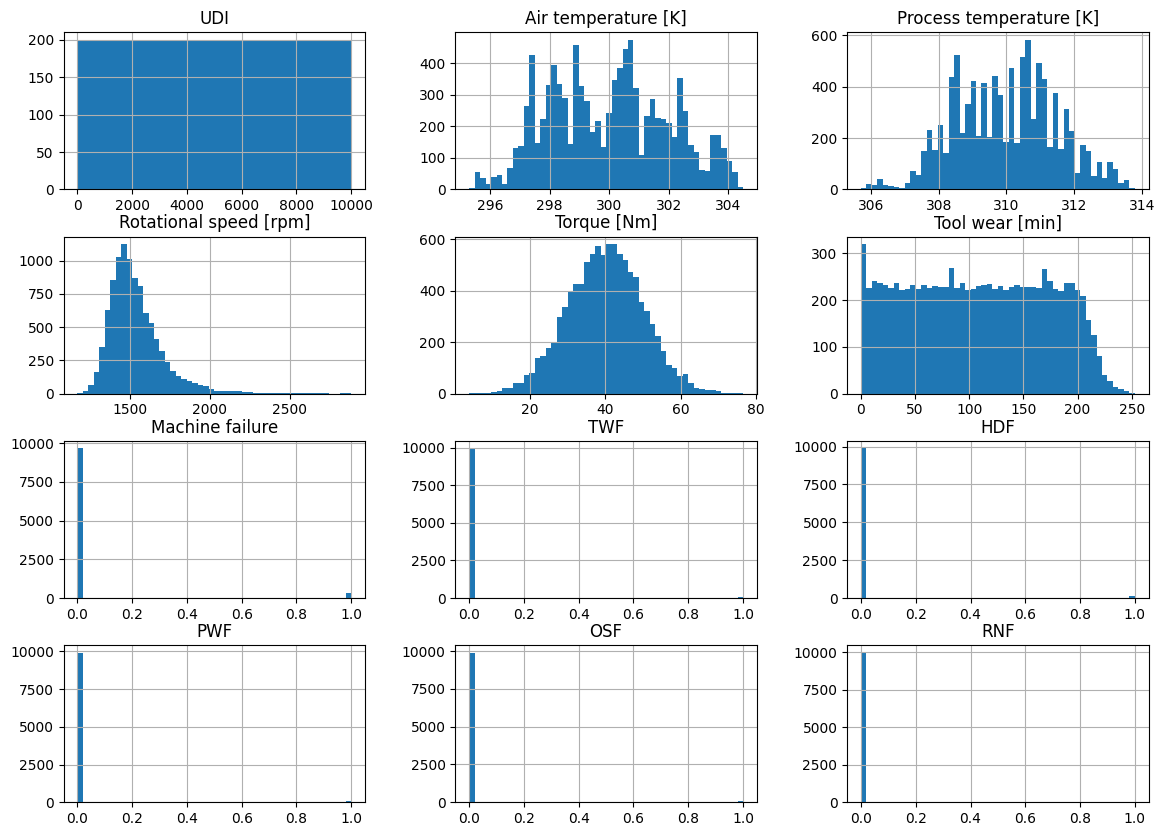

In [10]:
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols].hist(bins=50, figsize=(14,10))

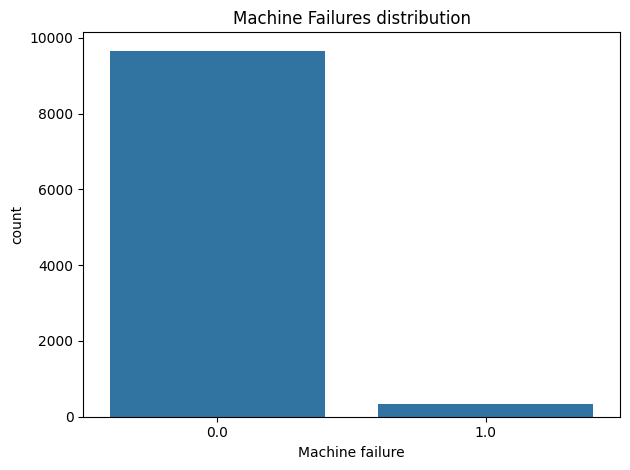

In [11]:
# Separate Target Value distribution
fig, axes = plt.subplots()
sns.countplot(data=df,x='Machine failure', ax=axes).set_title("Machine Failures distribution")
plt.tight_layout()

In [12]:
machine_failures = df['Machine failure'].value_counts()

In [13]:
print(f"Total working machines:{(machine_failures[0] / machine_failures.sum()).round(2)} %"),
print(f"Total failed machines {(machine_failures[1] / machine_failures.sum()).round(2)} %")

Total working machines:0.97 %
Total failed machines 0.03 %


Significant difference in class distribution
> more than 90%

In [14]:
failure_types = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

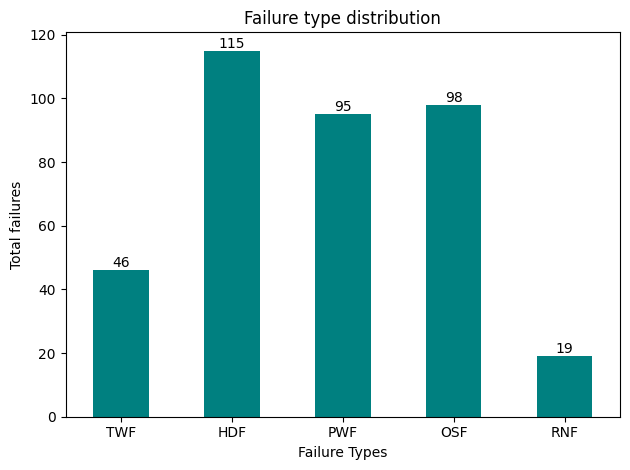

In [15]:
# Failure distribution by type
fig, ax = plt.subplots()
ax = failure_types.plot(
    kind='bar',
    rot=False,
    color='teal'
)
ax.bar_label(ax.containers[0])
plt.ylabel("Total failures")
plt.xlabel("Failure Types")
plt.title("Failure type distribution")
plt.tight_layout()
plt.show()

In [16]:
failure_types = failure_types.to_frame('Absolute Number')
failure_types['Percent From Total'] = ((failure_types['Absolute Number'] / failure_types['Absolute Number'].sum()) * 100).round(2)
failure_types.sort_values(by='Percent From Total', ascending=False)

,Absolute Number,Percent From Total
HDF,115.0,30.83
OSF,98.0,26.27
PWF,95.0,25.47
TWF,46.0,12.33
RNF,19.0,5.09


Interpretation: most of machines - 82.57% fail almost equally by 3 causes:
- HDF - heat dissipation failure - failure happens when the heat generated during the work proccess can't be effectively dissipated in the air and the rotational speed of the machine is getting lower **which both lead to overheating**
- OSF - overstrain failure - failure happens due high overstain of the machine (when the product of Torque * Tool wear exceeds the appropriate threshold)
- PWF - power failure - failure due to low or high power of the instrument (when the product of Torque * Rotational speed is below 3500W or above 9000W)
- TWF - tool wear time - **can be a failure if range of 200-240 mins** or planned replacement for 240 mins
- RNF - random failure - if there is no transparent failure type among 4 other types was defined

---
- HDF and PWF are the subjects to failure, **not always replacement**
- OSF and TWF are the subjects for both failure and replacement 
- RNF should be interpreted in attention to other details because there is no direct cause for that failure type

In [17]:
# Total failures df
failures_df = df[df['Machine failure'] == 1]
total_failures = len(failures_df)


# Multiple machine breakdowns df
multiple_breakdowns_mask = failures_df[['TWF', 'HDF', 'PWF','OSF','RNF']].sum(axis=1) > 1
multiple_breakdown_df = failures_df[multiple_breakdowns_mask]
total_multiple_breakdowns = len(multiple_breakdown_df)

# Multiple machine breakdowns from total
multiple_breakdowns_pct_from_total = round((total_multiple_breakdowns / total_failures) * 100, 2)

In [18]:
print("Total failures: ", total_failures)
print("Total multiple breakdown failures: ", total_multiple_breakdowns)
print("Percent of multiple machine breakdown from total: ", multiple_breakdowns_pct_from_total,"%")

Total failures:  339
Total multiple breakdown failures:  24
Percent of multiple machine breakdown from total:  7.08 %


In [19]:
numerical_cols = df.select_dtypes(include="number").columns
exclude_cols = ['UDI', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
sensor_cols = [c for c in numeric_cols if c not in exclude_cols]

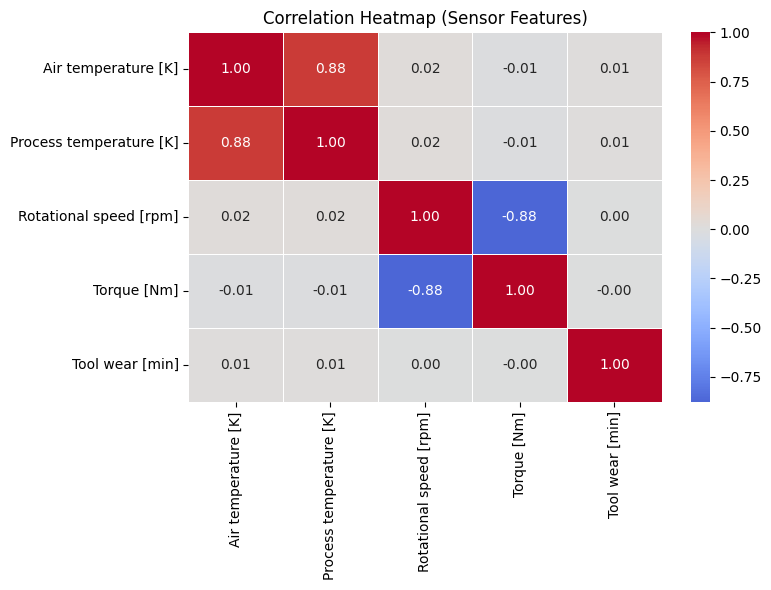

In [20]:
corr_matrix = df[sensor_cols].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap (Sensor Features)")
plt.tight_layout()
plt.show()

In [21]:
# Save data to .parquet
df = df.copy()
df.reset_index(drop=True, inplace=True)

df.to_parquet( PROCESSED_DATA_DIR / "milling_machine.parquet", index=False)

# Final interpretation of EDA analysis:
1) There are no null or NaN values in entire dataset - imputation not required
2) Distribution checked for all numerical columns - distribution is not normal by its nature but is expected and obvious for that type of data
3) There is a significant distribution issue in target variable - **subject to use ROC AUC / Precision & Recall metrics instead of accuracy**
4) 82% of all failures almost equally caused by 3 main breakdown types. First place is **HDF** failure
5) 12% of the failures are caused by either max. planned tool wear time or failure during prescribed range of tool wear (200-240 min)
6) 5% of all failures causes are not transparent to any of the failure types
7) We have two pairs of strongly correlated features:

- Air Temperature and Process temperature: High Positive correlation is obvious and expected for that kind of data. If air temperature is rising - the process temperature will rise as well
  
- Torque and Rotational speed: High Negative correlation is also obvious and expected. If the torque applied rises - rotational speed will decrease.

 Conclusion and following steps:

**Baseline model selection**

A **Logistic Regression** model was selected as the baseline. The goal of the baseline model is to give an answer to a fundamental question: **does the dataset contain a usable predictive signal for machine failures?**

Logistic Regression was chosen because it is:
- simple and fast to train,
- highly interpretable, allowing inspection of feature influence,
- robust enough to provide a meaningful benchmark,
- well-suited for imbalanced classification when combined with appropriate evaluation metrics.

As a linear model, it provides a conservative lower bound on performance. Any subsequent improvement achieved by more complex models can be meaningfully evaluated relative to this baseline.

**Main predictive model**, a **tree-based approach** (e.g., Random Forest or Gradient Boosting) was selected.

This choice is driven by the nature of the data and the problem:
- the dataset consists of sensor measurements with **non-linear relationships**,
- many failure mechanisms exhibit **threshold-based behavior**,
- important interactions between features (e.g., temperature, torque, and rotational speed) are expected,
- the target event (machine failure) is rare and embedded in noisy operational data.

Tree-based models naturally handle non-linearities, capture feature interactions without explicit feature engineering, and are robust to correlated features and outliers.

⭐️These observations motivate the use of recall-oriented evaluation metrics, decision threshold tuning, and non-linear ensemble models in the subsequent modeling stages.
